In [37]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("parking_citations.corrupted.csv")
print(df)
print(len(df))

/Users/mahimasanthoshi/Downloads/Garlanka/.env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        Ticket number           Issue Date  Issue time Meter Id  Marked Time  \
0          1103341116  2015-12-21T00:00:00      1251.0      NaN          NaN   
1          1103700150  2015-12-21T00:00:00      1435.0      NaN          NaN   
2          1104803000  2015-12-21T00:00:00      2055.0      NaN          NaN   
3          1104820732  2015-12-26T00:00:00      1515.0      NaN          NaN   
4          1105461453  2015-09-15T00:00:00       115.0      NaN          NaN   
...               ...                  ...         ...      ...          ...   
8726009    4347602394  2019-01-10T00:00:00      1245.0   VN686B          NaN   
8726010    4347602405  2019-01-10T00:00:00      1350.0    VN316          NaN   
8726011    4347602416  2019-01-10T00:00:00      1354.0    VN914          NaN   
8726012    4347602420  2019-01-10T00:00:00      1411.0    VN725          NaN   
8726013    4347602431  2019-01-10T00:00:00      1414.0    VN749          NaN   

        RP State Plate  Plate Expiry Da

**Model Development**

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import pickle

In [40]:
test_df=df[df['Make'].isna()]
train_df=df[~(df['Make'].isna())]

In [41]:
top_25_list=df['Make'].value_counts()[0:25].index.to_list()

In [42]:
top_25_list

['TOYT',
 'HOND',
 'FORD',
 'NISS',
 'CHEV',
 'BMW',
 'MERZ',
 'VOLK',
 'HYUN',
 'DODG',
 'LEXS',
 'KIA',
 'JEEP',
 'AUDI',
 'MAZD',
 'OTHR',
 'GMC',
 'CHRY',
 'INFI',
 'ACUR',
 'SUBA',
 'VOLV',
 'TOYO',
 'MITS',
 'CADI']

In [43]:
train_df['Top_25_Makes']=0
train_df.loc[train_df['Make'].isin(top_25_list), 'Top_25_Makes'] = 1
train_df['Top_25_Makes']=train_df['Top_25_Makes'].astype('category')

/Users/mahimasanthoshi/Downloads/Garlanka/.env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mahimasanthoshi/Downloads/Garlanka/.env/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/mahimasanthoshi/Downloads/Garlanka/.env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:

In [44]:
train_df

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Top_25_Makes
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,9.999900e+04,9.999900e+04,1
6,1106500452,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201605.0,NaN,MAZD,PA,BL,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,9.999900e+04,9.999900e+04,1
10,1106506424,2015-12-22T00:00:00,1100.0,NaN,NaN,CA,201511.0,NaN,FORD,TR,WH,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,9.999900e+04,9.999900e+04,1
11,1106506435,2015-12-22T00:00:00,1105.0,NaN,NaN,CA,201701.0,NaN,CHRY,PA,GO,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,9.999900e+04,9.999900e+04,1
14,1107179581,2015-12-27T00:00:00,1055.0,NaN,NaN,CA,201605.0,NaN,TOYO,PA,BK,3100 N HOLLYRIDGE DR,NaN,54.0,8058L,PREF PARKING,68.0,9.999900e+04,9.999900e+04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726006,4347602361,2019-01-10T00:00:00,810.0,VN752,NaN,CA,NaN,NaN,FORD,PA,GY,6301 SYLMAR AV,00300,53.0,88.13B+,METER EXP.,63.0,6.426622e+06,1.889882e+06,1
8726008,4347602383,2019-01-10T00:00:00,1244.0,VN687,NaN,CA,201909.0,NaN,PORS,PA,BK,14301 DELANO ST,00300,53.0,88.13B+,METER EXP.,63.0,6.427279e+06,1.889149e+06,0
8726010,4347602405,2019-01-10T00:00:00,1350.0,VN316,NaN,CA,201905.0,NaN,HYUN,PA,SL,14500 FRIAR ST,00300,53.0,88.13B+,METER EXP.,63.0,6.425963e+06,1.890254e+06,1
8726011,4347602416,2019-01-10T00:00:00,1354.0,VN914,NaN,CA,201912.0,NaN,NISS,PA,GY,14400 FRIAR ST,00300,53.0,88.13B+,METER EXP.,63.0,6.426623e+06,1.890252e+06,1


In [45]:
thresh_for_empty = 0.5
cols_to_drop = []
for col in train_df.columns:
    t = train_df[col].isnull().sum() / len(train_df)
    print(col, t)
    if t > thresh_for_empty:
        cols_to_drop.append(col)

Ticket number 0.0
Issue Date 0.0
Issue time 0.0002283396335183305
Meter Id 0.7397963164571603
Marked Time 0.966742275006288
RP State Plate 8.97294439252937e-05
Plate Expiry Date 0.09100240869627478
VIN 0.9981315162853204
Make 0.0
Body Style 0.0009156534047619485
Color 0.0003474434222580426
Location 3.4193573260533914e-05
Route 0.007269461880361965
Agency 1.3769224131758625e-06
Violation code 0.0
Violation Description 9.890892667979945e-05
Fine amount 0.0007332111850161467
Latitude 2.2948706886264372e-07
Longitude 2.2948706886264372e-07
Top_25_Makes 0.0


In [46]:
cols_to_drop

['Meter Id', 'Marked Time', 'VIN']

In [47]:
train_df.drop(columns=cols_to_drop,inplace=True)

/Users/mahimasanthoshi/Downloads/Garlanka/.env/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
train_df.dtypes

Ticket number              object
Issue Date                 object
Issue time                float64
RP State Plate             object
Plate Expiry Date         float64
Make                       object
Body Style                 object
Color                      object
Location                   object
Route                      object
Agency                    float64
Violation code             object
Violation Description      object
Fine amount               float64
Latitude                  float64
Longitude                 float64
Top_25_Makes             category
dtype: object

In [117]:
import datetime as dt
traindf=train_df[['RP State Plate','Body Style','Color','Top_25_Makes','Fine amount','Agency','Issue Date']]
traindf=traindf.dropna(how='any')
traindf['Fine amount']=traindf['Fine amount'].astype('int')
traindf['Agency']=traindf['Agency'].astype('category')
traindf['Issue Date']=pd.to_datetime(traindf['Issue Date']).dt.year
traindf=pd.get_dummies(traindf,columns=['RP State Plate','Body Style','Color','Agency'])

In [116]:
traindf

,Top_25_Makes,Fine amount,Issue Date,RP State Plate_AB,RP State Plate_AK,RP State Plate_AL,RP State Plate_AR,RP State Plate_AS,RP State Plate_AZ,RP State Plate_BC,...,Agency_56.0,Agency_57.0,Agency_58.0,Agency_59.0,Agency_60.0,Agency_68.0,Agency_70.0,Agency_71.0,Agency_77.0,Agency_97.0
4,1,93,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,163,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,93,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,93,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,68,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726006,1,63,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8726008,0,63,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8726010,1,63,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8726011,1,63,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
trainX, trainy = traindf.loc[:,traindf.columns != 'Top_25_Makes'],traindf.loc[:, traindf.columns == 'Top_25_Makes']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, test_size=0.2, random_state=123)

In [54]:
X_train

,Fine amount,Issue Date,RP State Plate_AB,RP State Plate_AK,RP State Plate_AL,RP State Plate_AR,RP State Plate_AS,RP State Plate_AZ,RP State Plate_BC,RP State Plate_CA,...,Agency_56.0,Agency_57.0,Agency_58.0,Agency_59.0,Agency_60.0,Agency_68.0,Agency_70.0,Agency_71.0,Agency_77.0,Agency_97.0
300391,73,2016,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1969004,73,2015,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1150244,73,2016,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5553947,68,2017,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8655587,63,2018,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599730,68,2017,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2490650,63,2015,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6348563,73,2017,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8473159,25,2018,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


/Users/mahimasanthoshi/Downloads/Garlanka/.env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.55      0.05      0.09     73953
           1       0.92      1.00      0.96    795773

    accuracy                           0.92    869726
   macro avg       0.73      0.52      0.52    869726
weighted avg       0.89      0.92      0.88    869726

F1 Score: 0.9558162570756267


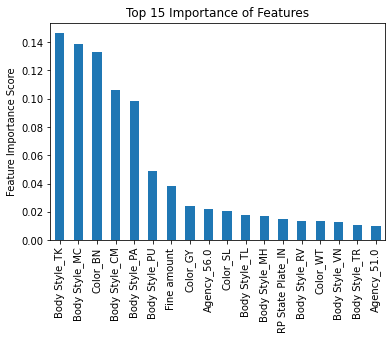

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

mdl= GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=0.25,max_features='sqrt', random_state=10)
mdl.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(mdl.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[feat_imp>0.01].plot(kind='bar', title='Top 15 Importance of Features')
plt.ylabel('Feature Importance Score')
pred=mdl.predict(X_test)
print(classification_report(y_test, pred))
print("F1 Score: {}".format(f1_score(y_test,pred)))

In [129]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
X_test

,Fine amount,Issue Date,RP State Plate_AB,RP State Plate_AK,RP State Plate_AL,RP State Plate_AR,RP State Plate_AS,RP State Plate_AZ,RP State Plate_BC,RP State Plate_CA,...,Agency_56.0,Agency_57.0,Agency_58.0,Agency_59.0,Agency_60.0,Agency_68.0,Agency_70.0,Agency_71.0,Agency_77.0,Agency_97.0
5544746,68,2017,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44786,73,2016,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8219503,50,2018,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1568150,58,2015,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7626376,58,2018,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388208,63,2015,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3227366,93,2015,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4127442,63,2016,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7151447,73,2018,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
pickle.dump(mdl, open("model.pickle", 'wb'))

In [91]:
test_df.loc[0,:].to_json()

'{"Ticket number":1103341116,"Issue Date":"2015-12-21T00:00:00","Issue time":1251.0,"Meter Id":null,"Marked Time":null,"RP State Plate":"CA","Plate Expiry Date":200304.0,"VIN":null,"Make":null,"Body Style":"PA","Color":"GY","Location":"13147 WELBY WAY","Route":"01521","Agency":1.0,"Violation code":"4000A1","Violation Description":"NO EVIDENCE OF REG","Fine amount":50.0,"Latitude":99999.0,"Longitude":99999.0}'

In [125]:
import requests
df=test_df[['RP State Plate','Body Style','Color','Fine amount','Agency','Issue Date']]
df=df.dropna(how='any')
df['Fine amount']=df['Fine amount'].astype('int')
df['Agency']=df['Agency'].astype('category')
df['Issue Date']=pd.to_datetime(df['Issue Date']).dt.year
df=pd.get_dummies(df,columns=['RP State Plate','Body Style','Color','Agency'])
df = df.loc[0,:]
df = df.to_json()
print(df)
url = 'http://127.0.0.1:5000/carmodel'
response = requests.post(url,data=data1)
response.json()

{"Fine amount":50,"Issue Date":2015,"RP State Plate_AB":0,"RP State Plate_AK":0,"RP State Plate_AL":0,"RP State Plate_AR":0,"RP State Plate_AS":0,"RP State Plate_AZ":0,"RP State Plate_BC":0,"RP State Plate_CA":1,"RP State Plate_CN":0,"RP State Plate_CO":0,"RP State Plate_CT":0,"RP State Plate_CZ":0,"RP State Plate_DC":0,"RP State Plate_DE":0,"RP State Plate_FL":0,"RP State Plate_FN":0,"RP State Plate_GA":0,"RP State Plate_GU":0,"RP State Plate_HI":0,"RP State Plate_IA":0,"RP State Plate_ID":0,"RP State Plate_IL":0,"RP State Plate_IN":0,"RP State Plate_KS":0,"RP State Plate_KY":0,"RP State Plate_LA":0,"RP State Plate_MA":0,"RP State Plate_MB":0,"RP State Plate_MD":0,"RP State Plate_ME":0,"RP State Plate_MI":0,"RP State Plate_MN":0,"RP State Plate_MO":0,"RP State Plate_MS":0,"RP State Plate_MT":0,"RP State Plate_MX":0,"RP State Plate_NB":0,"RP State Plate_NC":0,"RP State Plate_ND":0,"RP State Plate_NE":0,"RP State Plate_NF":0,"RP State Plate_NH":0,"RP State Plate_NJ":0,"RP State Plate_NM

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

**Compare SQLite vs Pandas**

In [ ]:
#Prefer to do it in pandas as the code is more straight forward and enhances readability
#As the data pull and analysis are in one tool(python), it helps in maintaining and sharing code easier

In [68]:
#calculate top 25 most common 'makes'
df['Make'].value_counts()[0:25]

TOYT    721411
HOND    491961
FORD    382695
NISS    311324
CHEV    297076
BMW     199221
MERZ    177307
VOLK    149501
HYUN    133864
DODG    127764
LEXS    124508
KIA     101746
JEEP    100909
AUDI     84229
MAZD     79853
OTHR     72411
GMC      62391
CHRY     57317
INFI     56809
ACUR     52703
SUBA     46898
VOLV     42330
TOYO     40064
MITS     37842
CADI     34080
Name: Make, dtype: int64

In [ ]:
'''
select Make,count(*) as c from df group by 1 order by c limit 25
'''

In [44]:
#calculate most common 'Color' for each 'Make'
pd.DataFrame(df[['Make','Color']].groupby(['Make'])['Color'].agg(pd.Series.mode)).reset_index()

,Make,Color
0,AAUD,BK
1,AAVH,WH
2,ABAR,BK
3,ABC,WH
4,ABRI,GY
...,...,...
1472,ZHON,"[BK, RE]"
1473,ZIEM,BK
1474,ZIEN,WH
1475,ZNEN,BK


In [132]:
'''
select Make,color,ROW_NUMBER() OVER(PARTITION BY Make ORDER BY col_count DESC) rowNumber from
(select Make,color,count(*) as col_count
from df
group by 1,2) temp
where rowNumber=1
'''

'\nselect Make,color,ROW_NUMBER() OVER(PARTITION BY Make ORDER BY col_count DESC) rowNumber from\n(select Make,color,count(*) as col_count\nfrom df\ngroup by 1,2) temp\nwhere rowNumber=1\n'

In [64]:
#find the first ticket issued for each 'Make'
df[['Make','Ticket number','Issue Date']].sort_values('Issue Date').groupby('Make').first()

,Ticket number,Issue Date
Make,,
AAUD,1125434741,2018-07-13T00:00:00
AAVH,1120968203,2018-03-29T00:00:00
ABAR,1112298272,2016-09-15T00:00:00
ABC,1112208086,2016-05-10T00:00:00
ABRI,1110238570,2017-04-18T00:00:00
...,...,...
ZHON,1116083113,2016-06-01T00:00:00
ZIEM,1107502152D,2015-01-02T00:00:00
ZIEN,1114761524,2018-07-01T00:00:00


In [ ]:
'''
select Make,ticket_number,ROW_NUMBER() OVER(PARTITION BY Make ORDER BY Issue_date) rowNumber from
from df
where rowNumber=1
'''